# CIFAR-10 Dataset

CIFAR-10 is an image dataset labelled with 10 classes, with 6000 images per class. So, It consists of 60,000 images, where each image is of size 32x32. The whole dataset is divided into 50,000 training images and 10,000 test images. More details about the dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

Since training of deep neural network requires a lot of time to finish, we use CIFAR-10 images, which are small in size of dataset and resolution. Below we are going to train a small deep convolutional neural network (CNN) using CIFAR-10 dataset. This excercise is meant to give you a flavour of training of CNNs.

### Downloading the Dataset and Loading onto Colab

As a first step, let us download the dataset from the website, using the following snippet of code.

In [1]:
# Load CIFAR-10
import keras
from keras.datasets import cifar10
# Load both training and test dataset
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [2]:
# Print the shape of training and test dataset
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


We observe that the images in the dataset are saved as a 4-dimensional array and the classess are saved in a 1-dimensional array.

### Visualising CIFAR-10 Images

In every machine learning/data science project, the first thing to do is to visualize your data and further familiarize with it.

In [3]:
# Check the type of image => it is a numpy array!
img = X_train[0,...]
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(32, 32, 3)


In [0]:
# We use matplotlib pyplot for visualizing the images
import matplotlib.pyplot as plt
#from scipy.misc import toimage
#from PIL import Image

In [0]:
def display_image(X,start=0,jump=1,row=4):
  end = start + jump * row
  fig = plt.figure(figsize=(10,10))
  
  k = start
  for i in range(start,end,jump):
    for j in range(start,end,jump):
      ax = fig.add_subplot(row,row,k+1,xticks=[],yticks=[])
      plt.imshow(X[k])
      k += jump
  plt.show()
  return

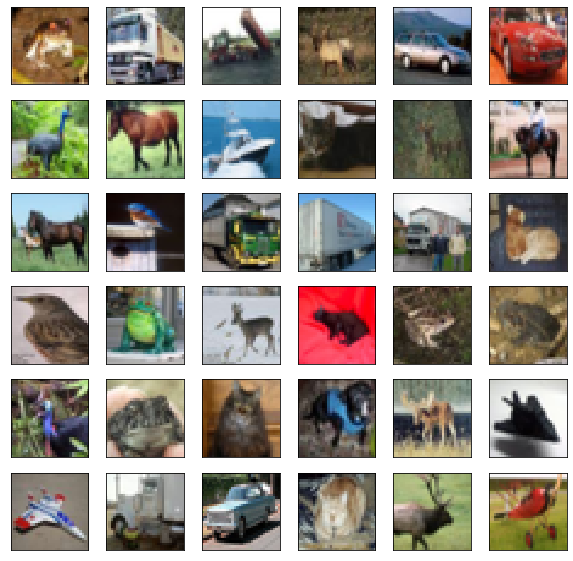

In [6]:
# Plot the images
display_image(X_train,0,1,6)

### Visualizing CIFAR-10 Images According to Categories

Wouldn't it be great if we can visualize the images according to their class?

Below, we first confirm that there are 10 categories in the data using np.unique().

Then we define define the image categories in an array. This information is obtained from [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [7]:
import numpy as np
num_classes = len(np.unique(y_train))
print("Number of image categories in CIFAR-10: %d" % (num_classes))

Number of image categories in CIFAR-10: 10


In [8]:
# Array of categories
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


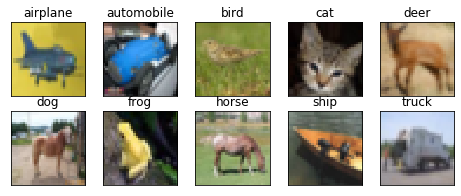

In [9]:
# Function to plot images according to their categories
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

Now we're convinced that the dataset consists of 10 categories of images!

# Define a CNN Model

Having visualized the data, it is time to model the data using a CNN for classification. We use Keras for defining, training & evaluating CNNs. 

In Keras, a CNN is defiend as a sequential layers of operations, as shown below.

In [0]:
# Import Sequential API from Keras
from keras.models import Sequential
# Import convolution and max pooling layers
from keras.layers import Conv2D,MaxPooling2D
# Import Dense (fully connected layer), dropout, activation APIs
from keras.layers import Dense,Dropout,Activation
# Flatten will be used before sending the 3D output of conv layers to a 
# fully connected layer
from keras.layers import Flatten

In [11]:
# Model definition
# First define a sequential model container
model = Sequential()
# Now add subsequent layers one by one

# Block 1
model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Block 3
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#############################  model.add(Dense("Fill in the appropriate dimesions for the last Dense layer"))
model.add(Dense(10))
model.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Having defined the model, let us have a look at the model and confirm everything is fine.

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)       

# Data Preparation

Having loaded the dataset and defined the model, we are now ready to train the model on the dataset and see how the model performs as a classifier. Towards that, the first step is to prepare the dataset for training by perfoming certain preprocessing steps.

### Creating One-Hot Vectors from Targets

In [13]:
print(y_train.shape)
print(y_train[:10])

(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [0]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


Note that the image categories are specified using integers. So, the first step is to change them from numbers to one-hot vectors.

In [0]:
# Change target array from integer numbers to binary one-hot vectors
y_train_b = keras.utils.to_categorical(y_train,num_classes)
y_test_b = keras.utils.to_categorical(y_test,num_classes)

One-hot vectors look like the following:

In [15]:
print('Shape of one-hot vector = ' + str(y_train_b.shape))
print('First 10 one-hot vectors are:')
print(y_train_b[:10])

Shape of one-hot vector = (50000, 10)
First 10 one-hot vectors are:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [16]:
u,ind = np.unique(y_train_b,axis=0,return_index=True)
print(u.shape)
print(u)

(10, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Let's now verify the correspondence between y_train values and one-hot vectors.

In [17]:
print(np.hstack((y_train[ind],u)))

[[9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [8. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [7. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [6. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [5. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [3. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Data Normalization

For a faster convergence during training, data is often normalized to a uniform scale by removing mean and dividing by a positive value such as standard deviation. In the following, we only normalize the images by dividing by maximum possible pixel value.

In [0]:
# data normalization
X_train_n = X_train.astype('float32')
X_test_n = X_test.astype('float32')
X_train_n /= 255
X_test_n /=255

In [19]:
print(X_train.dtype,X_train_n.dtype)
print(X_train.max(),X_train_n.max())

uint8 float32
255 1.0


# Model Training

The model is trained using stochastic gradient descent. RMS Prop is a specialized way of doing the gradient descent. For more details, please refer for example [this](https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b).

In [0]:
# optimizer: rms prop
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

The next step is to compile the model for further running.

In [21]:
# model compile
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Now, let's start training of the model, after defining a batch size and number of epochs for training.

In [0]:
batch_size = 32
epochs = 5

In [23]:
# Model training
model.fit(X_train_n,y_train_b,
         batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test_n, y_test_b),
              shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/5





50000/50000 [==============================] - 32s 645us/step - loss: 1.9434 - acc: 0.2852 - val_loss: 1.6544 - val_acc: 0.4088
Epoch 2/5
50000/50000 [==============================] - 19s 372us/step - loss: 1.6296 - acc: 0.4010 - val_loss: 1.4759 - val_acc: 0.4609
Epoch 3/5
50000/50000 [==============================] - 19s 390us/step - loss: 1.4964 - acc: 0.4551 - val_loss: 1.3783 - val_acc: 0.4983
Epoch 4/5
50000/50000 [==============================] - 19s 384us/step - loss: 1.4085 - acc: 0.4907 - val_loss: 1.3513 - val_acc: 0.5159
Epoch 5/5
50000/50000 [==============================] - 19s 385us/step - loss: 1.3395 - acc: 0.5197 - val_loss: 1.3145 - val_acc: 0.5359


# Evaluating the Model

The next step is to evaluate the model and check accuracy, etc. 

Below, we're going to check the loss and accuracy on test dataset.

In [24]:
# Score trained model.
scores = model.evaluate(X_test_n, y_test_b, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 130us/step
Test loss: 1.3144902843475341
Test accuracy: 0.5359


It is important to plot the loss convergence as well as improvement in accuracy during the training. We do it on both training as well as test datasets.

In [0]:
# plot accuracy & loss curve
def plot_training_curves(model):
  fig,axes = plt.subplots(1,2,figsize=(15,5))
  axes[0].plot(model.history.history['acc'],'r',label='Training set')
  axes[0].plot(model.history.history['val_acc'],'g',label='Test set')
  axes[0].set_xlabel("Epochs")
  axes[0].set_ylabel("Accuracy")
  axes[0].legend(loc='best')

  axes[1].plot(model.history.history['loss'],'r',label='Training set')
  axes[1].plot(model.history.history['val_loss'],'g',label='Test set')
  axes[1].set_xlabel("Epochs")
  axes[1].set_ylabel("Loss")
  axes[1].legend(loc='best')
  plt.show()

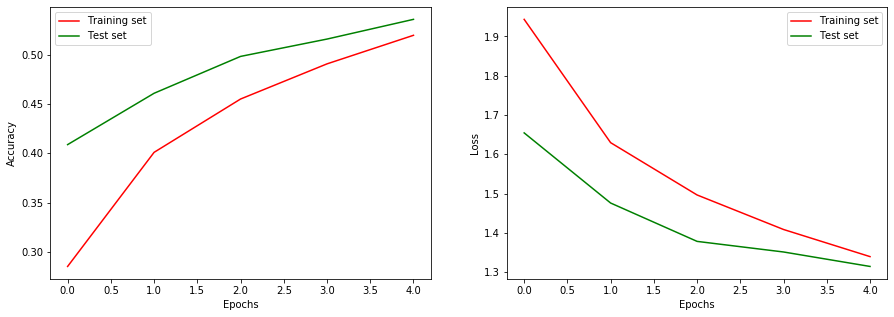

In [26]:
plot_training_curves(model)

# Saving the Model for Future Use

Once we train & fine-tune a model to the best accuracy, we may want to share it with others. Usually, Keras models are saved in [HDF5 format](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). Below, we go through this excercise and learn to save, load & run a model.

For more detailed study, we encourage you to refer [this](https://machinelearningmastery.com/save-load-keras-deep-learning-models/).

In [0]:
# Save the weights
model.save_weights('CIFAR10_Model1.h5')

# Save the model architecture
with open('CIFAR10_Model1_Architecture.json', 'w') as f:
    f.write(model.to_json())

In [0]:
# Loading the saved model
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('CIFAR10_Model1_Architecture.json', 'r') as f:
    model2 = model_from_json(f.read())

# Load weights into the new model
model2.load_weights('CIFAR10_Model1.h5')

In [0]:
# Before running the model, we need to compile it.
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model2.evaluate(X_test_n, y_test_b, verbose=1)

10000/10000 [==============================] - 1s 75us/step


[1.184152957725525, 0.5784]

Aren't the models the same?

# Saving Files Locally

In [0]:
from google.colab import files
files.download('CIFAR10_Model1_Architecture.json')
files.download('CIFAR10_Model1.h5')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
model.save_weights('/content/gdrive/My Drive/CIFAR10_Model1.h5')
with open('/content/gdrive/My Drive/CIFAR10_Model1_Architecture.json', 'w') as f:
    f.write(model.to_json())